In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [10]:
df = pd.read_csv('ml_ready_real_estate_data.csv')
df.head()


,bedroomCount,bathroomCount,habitableSurface,toiletCount,postCode,totalParkingCount,province_encoded,type_encoded,subtype_encoded,locality_encoded,...,hasSwimmingPool_encoded,hasFireplace_encoded,hasBasement_encoded,hasDressingRoom_encoded,hasDiningRoom_encoded,hasLift_encoded,hasHeatPump_encoded,hasPhotovoltaicPanels_encoded,hasLivingRoom_encoded,price
0,2.0,1.0,100.0,1.0,1040,1.0,1,1,1,951.0,...,0,0,1,0,0,1,0,0,1,399000.0
1,4.0,2.0,270.0,3.0,1040,0.0,1,2,2,951.0,...,0,0,1,0,1,0,0,0,1,895000.0
2,2.0,1.0,87.0,1.0,1040,0.0,1,1,1,951.0,...,0,0,0,0,0,1,0,0,1,465000.0
3,2.0,2.0,104.0,2.0,1040,0.0,1,1,1,551.0,...,0,0,0,0,0,1,0,0,1,590000.0
4,1.0,1.0,71.0,1.0,1040,0.0,1,1,3,951.0,...,0,0,0,0,0,0,0,0,0,289000.0


Step1: Importing Libraries

In [8]:
df.columns.tolist()

['bedroomCount',
 'bathroomCount',
 'habitableSurface',
 'toiletCount',
 'postCode',
 'totalParkingCount',
 'province_encoded',
 'type_encoded',
 'subtype_encoded',
 'locality_encoded',
 'epcScore_encoded',
 'hasAttic_encoded',
 'hasGarden_encoded',
 'hasAirConditioning_encoded',
 'hasArmoredDoor_encoded',
 'hasVisiophone_encoded',
 'hasTerrace_encoded',
 'hasOffice_encoded',
 'hasSwimmingPool_encoded',
 'hasFireplace_encoded',
 'hasBasement_encoded',
 'hasDressingRoom_encoded',
 'hasDiningRoom_encoded',
 'hasLift_encoded',
 'hasHeatPump_encoded',
 'hasPhotovoltaicPanels_encoded',
 'hasLivingRoom_encoded',
 'price']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Step2: Loading Dataset

In [14]:
df = pd.read_csv('ml_ready_real_estate_data.csv')
x = df.columns['bedroomCount', 'bathroomCount', 'habitableSurface', 'toiletCount', 'postCode',
 'totalParkingCount', 'province_encoded', 'type_encoded', 'subtype_encoded', 'locality_encoded',
 'epcScore_encoded', 'hasAttic_encoded', 'hasGarden_encoded', 'hasAirConditioning_encoded', 'hasArmoredDoor_encoded',
 'hasVisiophone_encoded', 'hasTerrace_encoded', 'hasOffice_encoded', 'hasSwimmingPool_encoded', 'hasFireplace_encoded',
 'hasBasement_encoded', 'hasDressingRoom_encoded', 'hasDiningRoom_encoded', 'hasLift_encoded', 'hasHeatPump_encoded',
 'hasPhotovoltaicPanels_encoded', 'hasLivingRoom_encoded']
y = df['price']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Step3: Selecting Features for Visualization

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ml_ready_real_estate_data.csv')
x  = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on test data
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")



Mean Squared Error: 122007572999.77
R^2 Score: 0.31


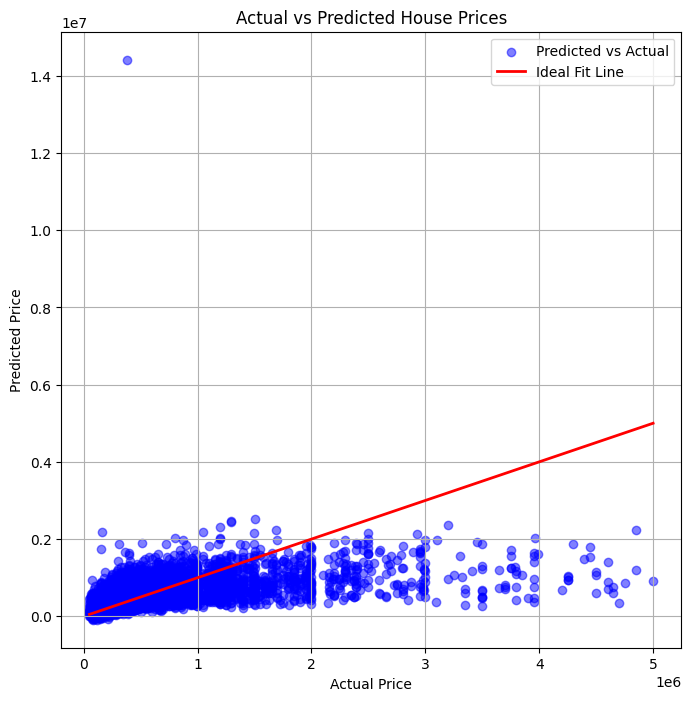

In [10]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Ideal Fit Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid(True)
plt.show()

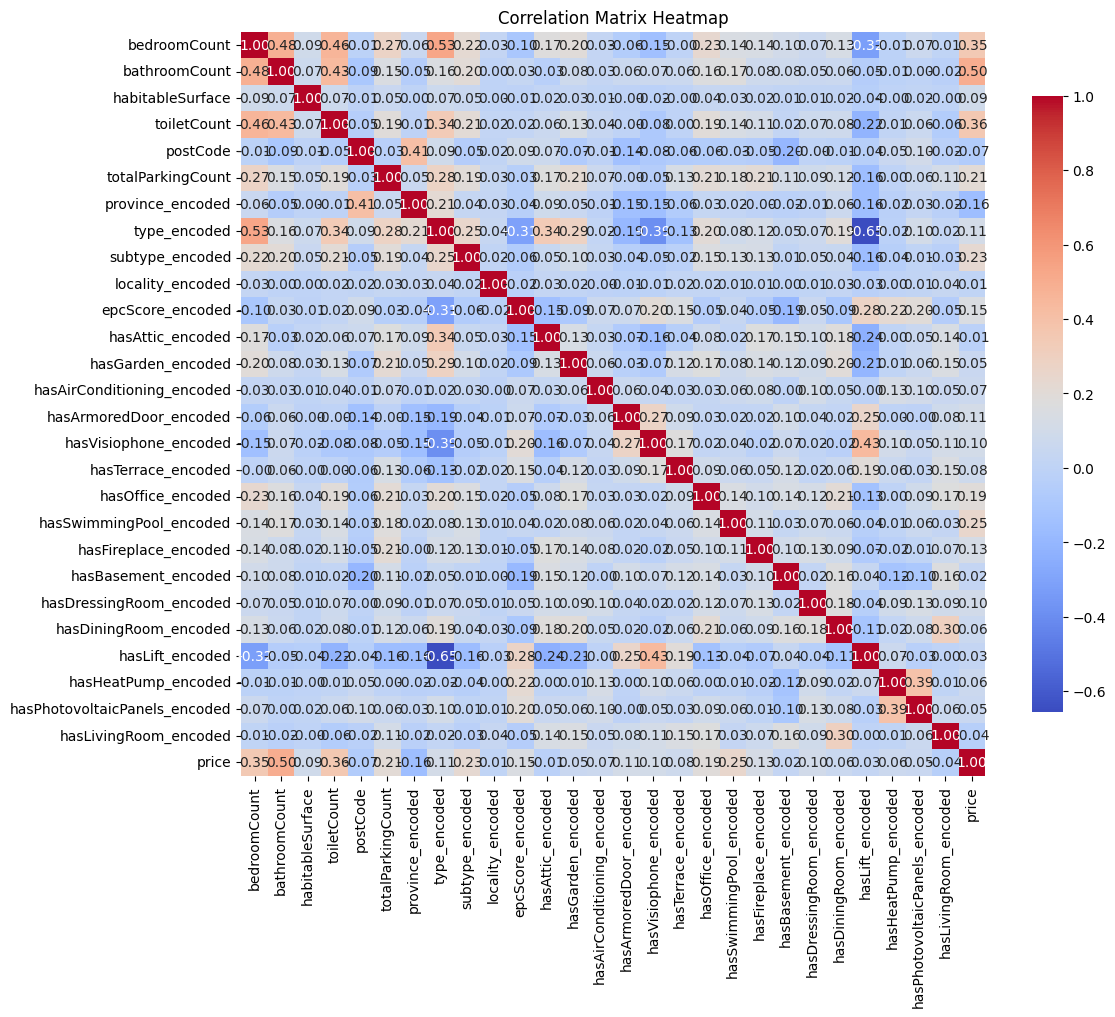

In [11]:
corr_matrix = df.corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix Heatmap")
plt.show()

In [12]:
# Get correlation of all variables with the target (last column assumed to be 'Price')
target_col = df.columns[-1]
correlations = corr_matrix[target_col].drop(target_col)  # drop correlation with itself

# Get top 5 variables with highest absolute correlation to the target
top_10 = correlations.abs().sort_values(ascending=False).head(10)

print("Top 5 variables most correlated with Price:")
print(top_10)

Top 5 variables most correlated with Price:
bathroomCount              0.501759
toiletCount                0.355912
bedroomCount               0.351888
hasSwimmingPool_encoded    0.248684
subtype_encoded            0.226019
totalParkingCount          0.205422
hasOffice_encoded          0.188418
province_encoded           0.158014
epcScore_encoded           0.149425
hasFireplace_encoded       0.126290
Name: price, dtype: float64


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset_wout_price_outliers.csv')
x  = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on test data
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 15211581586.25
R^2 Score: 0.43


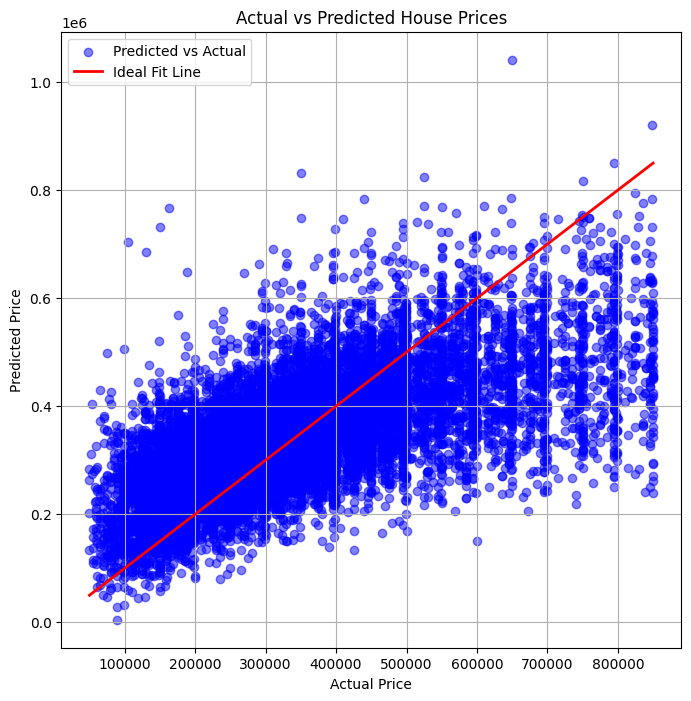

In [37]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Ideal Fit Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid(True)
plt.show()

Step5: Initializing and Training Model

Step6: Making Predictions

In [39]:
# Get correlation of all variables with the target (last column assumed to be 'Price')
target_col = df.columns[-1]
correlations = corr_matrix[target_col].drop(target_col)  # drop correlation with itself

# Get top 5 variables with highest absolute correlation to the target
top_10 = correlations.abs().sort_values(ascending=False).head(10)

print("Top 5 variables most correlated with Price:")
print(top_10)

Top 5 variables most correlated with Price:
bedroomCount                     0.405676
toiletCount                      0.380974
bathroomCount                    0.357685
totalParkingCount                0.232839
epcScore_encoded                 0.230839
province_encoded                 0.221081
type_encoded                     0.187026
hasPhotovoltaicPanels_encoded    0.185391
hasOffice_encoded                0.177470
subtype_encoded                  0.170885
Name: price, dtype: float64


Step7: Visualizing Best Fit Line in 3D